In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns
from tqdm import tqdm

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

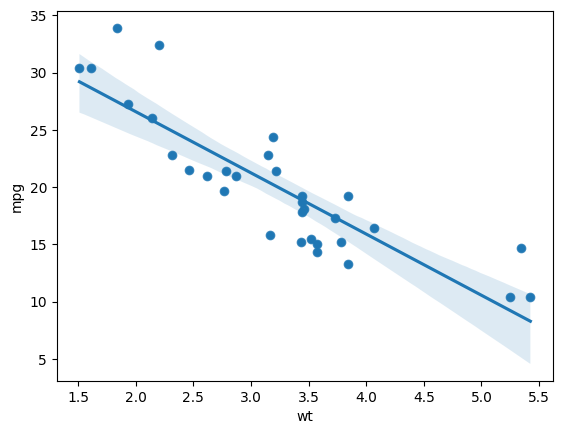

In [3]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [5]:
print(X.shape, y.shape)

torch.Size([32, 1]) torch.Size([32])


In [6]:
# Now initialize weights and biases with some random values, requires_grad should be true as we need to upgrade parameters for back propagation
w = torch.rand(1, requires_grad = True, dtype=torch.float64)
b = torch.rand(1, requires_grad = True, dtype=torch.float64)

In [7]:
num_epochs = 10000
learning_rate = 1e-2

for epoch in tqdm(range(num_epochs)):
    for i in range(0, len(X)):
        # forward pass
        y_predict = X[i] * w + b
        # calculate loss
        loss_tensor = torch.pow(y_predict - y[i], 2)
        # backward pass
        loss_tensor.backward()
        # extract losses
        loss_value = loss_tensor.item()#.data[0]
        # update weights and biases
        with torch.no_grad():
          w -= w.grad * learning_rate
          b -= b.grad * learning_rate
          w.grad.zero_()
          b.grad.zero_()
    if epoch % 1000 == 0:
        print(loss_value)

  0%|                    | 9/10000 [00:01<14:04, 11.83it/s]

18.193941676087277


 10%|█▋               | 1010/10000 [00:14<02:05, 71.76it/s]

0.25950258585889585


 20%|███▍             | 2015/10000 [00:28<01:44, 76.13it/s]

0.25950258585889585


 30%|█████            | 3011/10000 [00:41<01:33, 75.05it/s]

0.25950258585889585


 40%|██████▊          | 4014/10000 [00:54<01:19, 75.43it/s]

0.25950258585889585


 50%|████████▌        | 5007/10000 [01:07<01:04, 77.19it/s]

0.25950258585889585


 60%|██████████▏      | 6009/10000 [01:21<00:55, 71.90it/s]

0.25950258585889585


 70%|███████████▉     | 7012/10000 [01:34<00:39, 76.42it/s]

0.25950258585889585


 80%|█████████████▌   | 8010/10000 [01:48<00:26, 76.23it/s]

0.25950258585889585


 90%|███████████████▎ | 9012/10000 [02:01<00:13, 73.29it/s]

0.25950258585889585


100%|████████████████| 10000/10000 [02:14<00:00, 74.53it/s]


In [8]:
print(f"Weights : {w.item()} and Bias: {b.item()}")

Weights : -5.605667785304856 and Bias: 36.56326931324139


In [9]:
y_pred = (X * w + b).detach().numpy()

<Axes: >

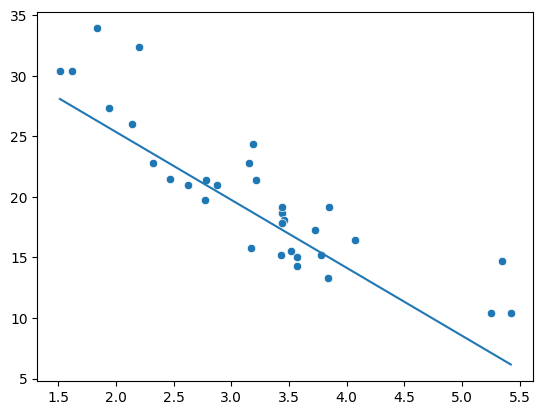

In [10]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred.reshape(-1))

In [11]:
# Now we will check the weights and biases predicted with linear regression model sklearn

from sklearn.linear_model import LinearRegression

linear = LinearRegression().fit(X_np, y_list)
print(f"weights: {linear.coef_}, Biases: {linear.intercept_}")

weights: [-5.3444715], Biases: 37.285125732421875


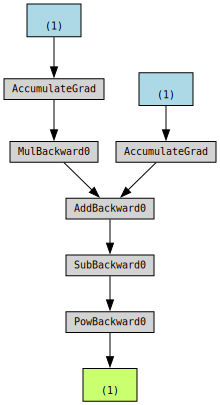

In [12]:
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
make_dot(loss_tensor)